In [1]:
import numpy as np

In [2]:
with open('/content/drive/My Drive/imdb_reviews.txt','r') as f:
  reviews=f.read()
with open('/content/drive/My Drive/imdb_labels.txt','r') as f:
  labels=f.read()

In [3]:
print(type(reviews))
print(labels[:10])
print(reviews[:1000])

<class 'str'>
positive
n
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal o

# **Data Preprocessing**

In [4]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
reviews=reviews.lower()
all_text=''.join([c for c in reviews if c not in punctuation]) ## reviews without punctuation marks

In [6]:
reviews_split=all_text.split('\n') ## list of different reviews
all_text=' '.join(reviews_split) ## all text in reviews

words=all_text.split() ##creates a list of different words

In [7]:
words[:30]

['bromwell',
 'high',
 'is',
 'a',
 'cartoon',
 'comedy',
 'it',
 'ran',
 'at',
 'the',
 'same',
 'time',
 'as',
 'some',
 'other',
 'programs',
 'about',
 'school',
 'life',
 'such',
 'as',
 'teachers',
 'my',
 'years',
 'in',
 'the',
 'teaching',
 'profession',
 'lead',
 'me']

 **Encoding words**

In [8]:
from collections import Counter ##counts occurences of different elements in a iterable

vocab_to_int=dict()
counter=Counter(words)
intindex1=1
for key,value in counter.most_common():
  vocab_to_int[key]=intindex1
  intindex1+=1
reviews_ints=[] ## tokenized reviews list

for review in reviews_split:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])


In [9]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

# print tokens in first review
print('Tokenized review: \n', reviews_ints[:1])

Unique words:  74072

Tokenized review: 
 [[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23]]


**Encoding the labels**

In [10]:
labels_list=labels.split('\n') ## list of labels 


In [11]:
encoded_labels=[1 if label=='positive' else 0 for label in labels_list] ## encoded list of labels 
#1 if positive else 0


In [12]:
print(encoded_labels[:10])
print(labels_list[:10])

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative']


**Removing outliers**

**Two steps**

*  Getting rid of extremely long or short reviews; the outliers
*  Padding/truncating the remaining data so that we have reviews of the same length.



In [13]:
review_lens=Counter([len(x) for x in reviews_ints]) 
print(type(review_lens))

<class 'collections.Counter'>


In [14]:
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 1
Maximum review length: 2514


**Removing zero length reviews**

In [15]:
print('Number of reviews before removing outliers: ', len(reviews_ints))
reviews_index_list=[]
countt=0

for z in reviews_ints:
  if(len(z)==0):
    reviews_index_list.append(countt)
    
  countt+=1
for index in sorted(reviews_index_list, reverse=True):
    del reviews_ints[index]
    del encoded_labels[index]
print('Number of reviews after removing outliers: ', len(reviews_ints))

Number of reviews before removing outliers:  25001
Number of reviews after removing outliers:  25000


In [16]:
encoded_labels=np.array(encoded_labels) ## because encoded labels was a python list

**Padding**

For reviews shorter than some seq_length, we'll pad with 0s. For reviews longer than seq_length, we can truncate them to the first seq_length words.

In [17]:
def pad_features(review_int,seq_len):
  ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
  features=np.zeros((len(review_int),seq_len),dtype=int)
 
  for i,z in enumerate(review_int):
    features[i,-len(z):]=np.array(z)[:seq_length]
    
  return features

In [18]:
seq_length = 200

features = pad_features(reviews_ints, seq_len=seq_length)

## test statements - do not change - ##
assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features[:30,:10])

[[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [22382    42 46418    15   706 17139  3389    47    77    35]
 [ 4505   505    15     3  3342   162  8312  1652     6  4819]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [   54    10    14   116    60   798   552    71   364     5]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    1   330   578    34     3   162   748  2731     9   325]
 [    9    11 10171  5305  1946   689   444    22   280   673]
 [    0     0     0     0     0     0     0     0     0

# **Creating Training, Validation and Test sets**

In [19]:
split_frac=0.8

split_idx = int(len(features)*split_frac)

train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		(2500, 200)


Note that currently test_x,train_x etc. are numpy arrays and not torch tensors.

# **Dataloaders**

In [20]:
import torch
from torch.utils.data  import TensorDataset,DataLoader

In [21]:
train_data=TensorDataset(torch.from_numpy(train_x),torch.from_numpy(train_y))
valid_data=TensorDataset(torch.from_numpy(val_x),torch.from_numpy(val_y))
test_data=TensorDataset(torch.from_numpy(test_x),torch.from_numpy(test_y))

In [22]:
batch_size=50

train_loader=DataLoader(train_data,shuffle=True,num_workers=2,batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [23]:
print(train_loader)

In [24]:
sample_x,sample_y=next(iter(train_loader))
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[13078,     6,     3,  ...,    15,    21,  3685],
        [   10,   161,    23,  ...,   843, 13614,    10],
        [    0,     0,     0,  ...,   887,   535,  1156],
        ...,
        [    0,     0,     0,  ...,    64,   106, 16226],
        [   84,   123,    11,  ...,    60,   638,    11],
        [48011,   319,   324,  ..., 15237,    42,  4116]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 0])


#**Creating Model Architecture**

In [25]:
cuda_availability=torch.cuda.is_available()

In [26]:
import torch.nn as nn

In [27]:
class SentimentRNN(nn.Module):
  def __init__(self,vocab_size,output_size,embedding_dim,hidden_dim,n_layers,drop_prob=0.5):
    super(SentimentRNN,self).__init__()
    self.output_size=output_size
    self.n_layers=n_layers
    self.hidden_dim=hidden_dim
    self.embedding_dim=embedding_dim
    self.drop_prob=drop_prob
    self.vocab_size=vocab_size

    self.embedding=nn.Embedding(num_embeddings=self.vocab_size,embedding_dim=self.embedding_dim)
    self.lstm=nn.LSTM(input_size=self.embedding_dim,hidden_size=self.hidden_dim,num_layers=self.n_layers,batch_first=True,dropout=self.drop_prob)

    self.dropout = nn.Dropout(0.3)

    self.linear=nn.Linear(in_features=self.hidden_dim,out_features=output_size)
    self.sig = nn.Sigmoid()

  def forward(self,x,hidden):
    batch_size=x.size(0)

    x=x.long()
    z1=self.embedding(x)
    r_out,hidden=self.lstm(z1,hidden)

    r_out=r_out.contiguous().view(-1,self.hidden_dim) ##stacking up lstm outputs

    out=self.dropout(r_out)
    out=self.linear(out)

    sig_out = self.sig(out)

    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:, -1] # get outputs of last layer of outputs
    return sig_out,hidden

  def init_hidden(self,batch_size):

    weight = next(self.parameters()).data
        
    if cuda_availability:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
    else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
    return hidden


    


![alt text](https://)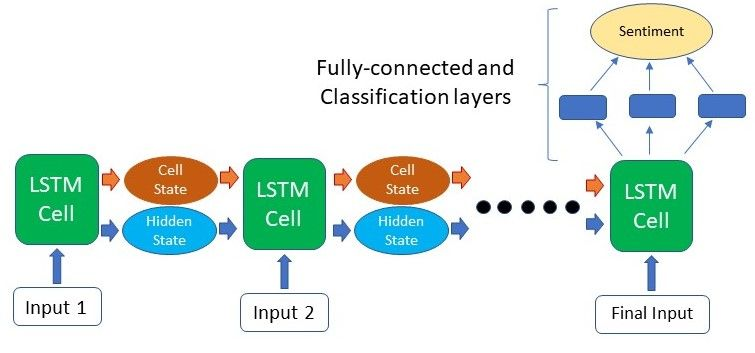

#Instantiate the network

In [28]:

vocab_size =len(vocab_to_int)+1
output_size =2 
embedding_dim =512 
hidden_dim = 512
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(74073, 512)
  (lstm): LSTM(512, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear): Linear(in_features=512, out_features=2, bias=True)
  (sig): Sigmoid()
)


In [29]:
#loss and optimization functions
lr=0.001

criterion=nn.BCELoss()
optimizer=torch.optim.Adam(net.parameters(),lr=lr)

In [30]:
def training(net,dataloader,valloader,epochs,clip,print_every,lr):
  if cuda_availability:
    net.cuda()
  counter=0
  criterion=nn.BCELoss()
  optimizer=torch.optim.Adam(net.parameters(),lr=lr)
  net.train()
  for epoch in range(epochs):
    ##initialize hidden state
    h=net.init_hidden(batch_size)

    for inputs,labels in dataloader:
      counter+=1

      if cuda_availability:
        inputs,labels=inputs.cuda(),labels.cuda()

      h=tuple([each.data for each in h])

      net.zero_grad()

      output,h=net(inputs,h)

      loss=criterion(output.squeeze(),labels.float())
      loss.backward()
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()

      if counter%print_every==0:
        val_h=net.init_hidden(batch_size)
        val_losses=[]
        net.eval()
        for inputs,labels in valloader:
          val_h=tuple([each.data for each in val_h])

          if cuda_availability:

            inputs, labels = inputs.cuda(), labels.cuda()
        
          output, val_h = net(inputs, val_h)
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())

        net.train()
        print("Epoch: {}/{}...".format(epoch+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))








In [31]:
training(net,train_loader,valid_loader,3,5,100,0.001)

Epoch: 1/3... Step: 100... Loss: 0.691083... Val Loss: 0.829525
Epoch: 1/3... Step: 200... Loss: 0.636385... Val Loss: 0.609640
Epoch: 1/3... Step: 300... Loss: 0.530923... Val Loss: 0.624240
Epoch: 1/3... Step: 400... Loss: 0.673866... Val Loss: 0.653502
Epoch: 2/3... Step: 500... Loss: 0.493997... Val Loss: 0.557190
Epoch: 2/3... Step: 600... Loss: 0.452441... Val Loss: 0.514811
Epoch: 2/3... Step: 700... Loss: 0.306380... Val Loss: 0.481529
Epoch: 2/3... Step: 800... Loss: 0.316603... Val Loss: 0.467138
Epoch: 3/3... Step: 900... Loss: 0.191789... Val Loss: 0.465534
Epoch: 3/3... Step: 1000... Loss: 0.328462... Val Loss: 0.597784
Epoch: 3/3... Step: 1100... Loss: 0.397530... Val Loss: 0.446721
Epoch: 3/3... Step: 1200... Loss: 0.322491... Val Loss: 0.442946


# **Testing**

In [34]:
test_losses=[]
num_correct=0
criterion=nn.BCELoss()
h=net.init_hidden(batch_size)

net.eval()

for inputs,labels in test_loader:
  h=tuple([each.data for each in h])
  if cuda_availability:
        inputs, labels = inputs.cuda(), labels.cuda()
  outputs,h =net(inputs,h)
  test_loss=criterion(outputs.squeeze(),labels.float())
  test_losses.append(test_loss.item())

  pred=torch.round(outputs.squeeze())

  correct_tensor=pred.eq(labels.float().view_as(pred))

  correct = np.squeeze(correct_tensor.numpy()) if not cuda_availability else np.squeeze(correct_tensor.cpu().numpy())
  num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.454
Test accuracy: 0.816


# **Inference on test review**

In [38]:
from string import punctuation
def tokenize_review(test_review):
  test_review=test_review.lower()
  test_text=''.join([c for c in test_review if c not in punctuation])
  test_words=test_text.split()
  test_ints=[]
  test_ints.append([vocab_to_int[word] for word in test_words])

  return test_ints



In [43]:
def predict(net,test_review,sequence_length=200):
  test_ints=tokenize_review(test_review)
  features=pad_features(test_ints,sequence_length)
  feature_tensor=torch.from_numpy(features)
  batch_size=1
  h = net.init_hidden(batch_size)
    
  if cuda_availability:
      feature_tensor = feature_tensor.cuda()
      net.cuda()
    
    
  output, h = net(feature_tensor, h)
  pred = torch.round(output.squeeze())
  print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
  if pred.item()==1:
        print("Positive review detected!")
  else:
        print("Negative review detected.")


  



In [50]:
test_review=input()
predict(net,test_review,200)

pretty great movie .the direction was amazing ... however more efforts should have been made in the cgi department.. worth watching!!
Prediction value, pre-rounding: 0.972545
Positive review detected!
